# Labolatorium 5
## Równania nieliniowe


---
### Przydatne importy

In [63]:
import numpy as np
from mpmath import *
from matplotlib import pyplot as plt

---
### Funkcje do testów

1. $f_1(x) = cos(x)cosh(x) - 1, [\frac{3}{2}\pi, 2\pi]$
<br/> <br/>
2. $f_2(x) = \frac{1}{x} - tan(x), [0, \frac{\pi}{2}]$
<br/> <br/>
3. $f_3(x) = 2^{-x} + e^{x} + 2cos(x) - 6, [1,3]$

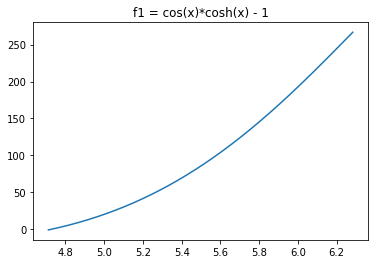

In [64]:
def f1(x):
    mpf_x = mpf(str(x)) if isinstance(x, float) else mpf(x)
    return cos(mpf_x)*cosh(mpf_x) - mpf(1)

f1_range = (mpf('1.5')*pi, 2*pi)

x = np.linspace(np.float64(f1_range[0]), np.float64(f1_range[1]), 1000)
y = np.array([f1(x_el) for x_el in x])
plt.plot(x, y)
plt.title("f1 = cos(x)*cosh(x) - 1")
plt.show()

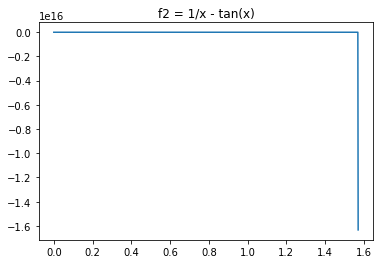

In [65]:
def f2(x):
    mpf_x = mpf(str(x)) if isinstance(x, float) else mpf(x)
    return 1/mpf_x - tan(mpf_x)

f2_range = (0, pi/2)

x = np.linspace(f2_range[0] + 0.00001, np.float64(f2_range[1]), 1000)
y = np.array([f2(x_el) for x_el in x])
plt.plot(x, y)
plt.title("f2 = 1/x - tan(x)")
plt.show()

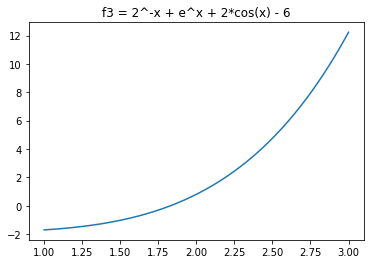

In [66]:
def f3(x):
    mpf_x = mpf(str(x)) if isinstance(x, float) else mpf(x)
    return mpf(2)**(-mpf_x) + exp(mpf_x) + mpf(2)*cos(mpf_x) - mpf(6)

f3_range = (1, 3)

x = np.linspace(f3_range[0], f3_range[1], 1000)
y = np.array([f3(x_el) for x_el in x])
plt.plot(x, y)
plt.title("f3 = 2^-x + e^x + 2*cos(x) - 6")
plt.show()

---
### Zadanie 1 Metoda bisekcji

Napisz funkcję realizującą metodę bisekcji dla danej funkcji $f$ w oparciu o arytmetykę o zmiennej precyzji (**mpmath.mpf**). Funkcja przyjmuje następujące argumenty:
- Minimalną precyzję obliczeń (liczba cyfr znaczących)
- Krańce przedziału
- Błąd bezwzględny obliczeń

Funkcja ma zwracać wyznaczone miejsce zerowe, wyliczoną wartość w miejscu zerowym oraz liczbę iteracji potrzebną do uzyskania określonej dokładności. Przetestuj działanie metody dla funkcji podanych na początku instrukcji. Jaka liczba iteracji jest potrzebna do uzyskania bezwzględnej dokładności rzędu: $10^{-7}, 10^{-15}, 10^{-33}$? W jaki sposób możemy obliczyć $k$ pierwszy dodatnich pierwiastków funkcji $f_1(x)$ ?

In [67]:
def bisection(function, f_range, epsilon = mpf("10e-11"), precision = 50, max_iterations = 10**6):
    with workdps(precision):
        a, b = f_range
        iteration = 0
        try:
            u = function(a)
        except:
            u = function(a + epsilon)
        
        try:
            v = function(b)            
        except: 
            v = function(b - epsilon)
        e = b - a

        if np.sign(u) == np.sign(v):
            raise Exception("Wartości na krańcah przedziału mają taki sam znak")

        for k in range(max_iterations):
            e = e / 2
            c = a + e
            w = function(c)

            if abs(e) < epsilon or abs(w) < epsilon:
                return c, w, k

            if np.sign(u) != np.sign(w):
                b = c
                v = w
            else:
                a = c
                u = w

        raise Exception(f"Przekroczonono limit iteracji: {max_iterations}.\n \
        Miejsce zerowe prawdopodobnie nie istnieje lub nie można go znaleźć z oczekiwaną dokładnością.")
    

#### Przetestowanie działania metody dla funkcji podanych na początku instrukcji

1. $f_1(x) = cos(x)cosh(x) - 1, [\frac{3}{2}\pi, 2\pi]$

In [69]:
x_0, y_0, k = bisection(f1, f1_range)

print("Miejsce zerowe obliczone metodą bisekcji:")
nprint(x_0, 20)
print("Rzeczywista wartość funkcji w znalezionym miejscu zerowym:")
nprint(y_0, 20)

wolphram_x0 = mpf('4.73004074486270')

print("Miejsce zerowe wg WolphramAlpha:")
nprint(wolphram_x0, 20)

print("Różnica:")
nprint(abs(x_0 - wolphram_x0), 20)

Miejsce zerowe obliczone metodą bisekcji:
4.7300407448629612844
Rzeczywista wartość funkcji w znalezionym miejscu zerowym:
1.4829791218925659644e-11
Miejsce zerowe wg WolphramAlpha:
4.7300407448627002083
Różnica:
2.6107609638787523847e-13


2. $f_2(x) = \frac{1}{x} - tan(x), [0, \frac{\pi}{2}]$

In [70]:
x_0, y_0, k = bisection(f2, f2_range)

print("Miejsce zerowe obliczone metodą bisekcji:")
nprint(x_0, 20)
print("Rzeczywista wartość funkcji w znalezionym miejscu zerowym:")
nprint(y_0, 20)

wolphram_x0 = mpf('0.86033358901938')

print("Miejsce zerowe wg WolphramAlpha:")
nprint(wolphram_x0, 20)

print("Różnica:")
nprint(abs(x_0 - wolphram_x0), 20)

Miejsce zerowe obliczone metodą bisekcji:
0.86033358903299544964
Rzeczywista wartość funkcji w znalezionym miejscu zerowym:
-5.0406196631711404066e-11
Miejsce zerowe wg WolphramAlpha:
0.86033358901937995178
Różnica:
1.3615497859308080331e-11


3. $f_3(x) = 2^{-x} + e^{x} + 2cos(x) - 6, [1,3]$

In [71]:
x_0, y_0, k = bisection(f3, f3_range)

print("Miejsce zerowe obliczone metodą bisekcji:")
nprint(x_0, 20)
print("Rzeczywista wartość funkcji w znalezionym miejscu zerowym:")
nprint(y_0, 20)

wolphram_x0 = mpf('1.829383601963385')

print("Miejsce zerowe wg WolphramAlpha:")
nprint(wolphram_x0, 20)

print("Różnica:")
nprint(abs(x_0 - wolphram_x0), 20)

Miejsce zerowe obliczone metodą bisekcji:
1.8293836019583978
Rzeczywista wartość funkcji w znalezionym miejscu zerowym:
1.0068764825471993434e-10
Miejsce zerowe wg WolphramAlpha:
1.8293836019633848977
Różnica:
4.9871218266162031796e-12


#### Teraz sprawdzimy jaka liczba iteracji jest potrzebna do uzyskania bezwzględnej dokładności rzędu:
$10^{-7}, 10^{-15}, 10^{-33}$

### $f_1$

In [72]:
print("10^(-7)")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji: {iterations}")
print("10^(-15)")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji: {iterations}")
print("10^(-33)")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji: {iterations}")

10^(-7)
Liczba potrzebnych iteracji: 23
10^(-15)
Liczba potrzebnych iteracji: 50
10^(-33)
Liczba potrzebnych iteracji: 110


### $f_2$

In [73]:
print("10^(-7)")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji: {iterations}")
print("10^(-15)")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji: {iterations}")
print("10^(-33)")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji: {iterations}")

10^(-7)
Liczba potrzebnych iteracji: 23
10^(-15)
Liczba potrzebnych iteracji: 50
10^(-33)
Liczba potrzebnych iteracji: 110


### $f_3$

In [74]:
print("10^(-7)")
_, _, iterations = bisection(f3, f3_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji: {iterations}")
print("10^(-15)")
_, _, iterations = bisection(f3, f3_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji: {iterations}")
print("10^(-33)")
_, _, iterations = bisection(f3, f3_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji: {iterations}")

10^(-7)
Liczba potrzebnych iteracji: 22
10^(-15)
Liczba potrzebnych iteracji: 50
10^(-33)
Liczba potrzebnych iteracji: 110


Jak widać liczba potrzebnych iteracji zależy od oczekiwanego błedu bezwzględnego obliczeń

#### W jaki sposób możemy obliczyć $k$ pierwszy dodatnich pierwiastków funkcji $f_1(x)$ ?

Możemy na przykład zbudować początkowy przedział o niewielkiej długości (np. $\frac{\pi}{4}$) i próbować znaleźć pierwiastek w danym przedziale, a następnie dany przedział przesuwać "w prawo" o jego długość. Przykład działania poniżej:

In [75]:
roots = []
f_range = (0, pi/4)
k = 5
i = 100
while len(roots) < k or i == 0:
    try:
        root = bisection(f1, f_range)
        roots.append(root)
    except:
        pass

    i -= 1
    f_range = (f_range[1], f_range[1] + pi/4)

print(roots)

[(mpf('0.0030679615757712823'), mpf('-1.4765508699987227e-11'), 7), (mpf('4.7300407448629613'), mpf('1.482979121892566e-11'), 30), (mpf('7.8532046241460474'), mpf('-6.4569151328868677e-8'), 32), (mpf('10.995607838036075'), mpf('1.0254847847881997e-6'), 32), (mpf('14.137165491310825'), mpf('-3.6803426313538517e-5'), 32)]


---
### Zadanie 2 Metoda Newtona

Napisz funkcję realizującą metodę Newtona w oparciu o arytmetykę o zmiennej precyzji (**mpmath.mpf**). Funkcja ma wykorzystywać dwa kryteria stopu:
- maksymalną liczbę iteracji
- moduł różnicy kolejnych przybliżeń mniejszy od danej wartości $\epsilon$

Oprócz przybliżonej wartości pierwiastka funkcja ma zwrócić liczbę iteracji potrzebną do uzyskania określonej dokładności $\epsilon$. Przetestuj działanie metody dla funkcji podanych na początku instrukcji (dodatkowo dostępne pochodne tych funkcji). Porównaj zbieżność metody ze zbieżnością uzyskaną dla metody bisekcji.

Pochodne funkcji:
1. $\frac{df_1}{dx}(x) = cos(x)sinh(x) - sin(x) * cosh(x), [\frac{3}{2}\pi, 2\pi]$
<br/> <br/>
2. $\frac{df_2}{dx}(x) = -\frac{1}{x^2} - \frac{1}{cos^2(x)}, [0, \frac{\pi}{2}]$
<br/> <br/>
3. $\frac{df_3}{dx}(x) = -ln(2)\cdot2^{-x} + e^{x} - 2sin(x), [1,3]$

In [ ]:
def df1(x):
    mpf_x = mpf(str(x)) if isinstance(x, float) else mpf(x)
    return cos(mpf_x)*sinh(mpf_x) - sin(mpf_x)*cosh(mpf_x)


def df2(x):
    mpf_x = mpf(str(x)) if isinstance(x, float) else mpf(x)
    return -mpf(1)/mpf_x**2 - mpf(1)/((cos(mpf_x))**2)


def df3(x):
    mpf_x = mpf(str(x)) if isinstance(x, float) else mpf(x)
    return -ln(mpf(2))*mpf(2)**(-mpf_x) + exp(mpf_x) - mpf(2)*sin(mpf_x)

### algorytm

In [78]:
def newton(function, d_function, f_range, epsilon = mpf("10e-11"), precision = 50, max_iterations = 10**6):
    with workdps(precision):
        a, b = f_range
        x_0 = (a+b)/2
        v = function(x_0)
        for k in range(max_iterations):
            x_1 = x_0 - v / d_function(x_0)
            v = function(x_1)
            
            if abs(x_1-x_0) < epsilon:
                return x_1, v, k
            
            x_0 = x_1

        print("Osiągnięto limit iteracji")
        return x_1, v, max_iterations

#### Przetestowanie działania metody dla funkcji podanych na początku instrukcji

1. $f_1(x) = cos(x)cosh(x) - 1, [\frac{3}{2}\pi, 2\pi]$

In [80]:
x_0, y_0, k = newton(f1, df1, f1_range)

print("Miejsce zerowe obliczone metodą Newtona:")
nprint(x_0, 20)
print("Rzeczywista wartość funkcji w znalezionym miejscu zerowym:")
nprint(y_0, 20)

wolphram_x0 = mpf('4.73004074486270')

print("\nMiejsce zerowe wg WolphramAlpha:")
nprint(wolphram_x0, 20)

print("Różnica:")
nprint(abs(x_0 - wolphram_x0), 20)


bisection_x0, _, _ = bisection(f1, f1_range)

print("\nMiejsce zerowe obliczone metodą bisekcji:")
nprint(bisection_x0, 20)

print("Różnica:")
nprint(abs(x_0 - bisection_x0), 20)

Miejsce zerowe obliczone metodą Newtona:
4.730040744862704026
Rzeczywista wartość funkcji w znalezionym miejscu zerowym:
1.2144128089784762488e-19

Miejsce zerowe wg WolphramAlpha:
4.7300407448627002083
Różnica:
3.8177531006327354673e-15

Miejsce zerowe obliczone metodą bisekcji:
4.7300407448629612844
Różnica:
2.572583432872424896e-13


2. $f_2(x) = \frac{1}{x} - tan(x), [0, \frac{\pi}{2}]$

In [81]:
x_0, y_0, k = newton(f2, df2, f2_range)

print("Miejsce zerowe obliczone metodą Newtona:")
nprint(x_0, 20)
print("Rzeczywista wartość funkcji w znalezionym miejscu zerowym:")
nprint(y_0, 20)

wolphram_x0 = mpf('0.86033358901938')

print("\nMiejsce zerowe wg WolphramAlpha:")
nprint(wolphram_x0, 20)

print("Różnica:")
nprint(abs(x_0 - wolphram_x0), 20)


bisection_x0, _, _ = bisection(f2, f2_range)

print("\nMiejsce zerowe obliczone metodą bisekcji:")
nprint(bisection_x0, 20)

print("Różnica:")
nprint(abs(x_0 - bisection_x0), 20)

Miejsce zerowe obliczone metodą Newtona:
0.86033358901937976248
Rzeczywista wartość funkcji w znalezionym miejscu zerowym:
-6.1982326474128034108e-30

Miejsce zerowe wg WolphramAlpha:
0.86033358901937995178
Różnica:
1.892949940922721563e-16

Miejsce zerowe obliczone metodą bisekcji:
0.86033358903299544964
Różnica:
1.361568715430217332e-11


3. $f_3(x) = 2^{-x} + e^{x} + 2cos(x) - 6, [1,3]$

In [83]:
x_0, y_0, k = newton(f3, df3, f3_range)

print("Miejsce zerowe obliczone metodą Newtona:")
nprint(x_0, 20)
print("Rzeczywista wartość funkcji w znalezionym miejscu zerowym:")
nprint(y_0, 20)

wolphram_x0 = mpf('1.829383601963385')

print("\nMiejsce zerowe wg WolphramAlpha:")
nprint(wolphram_x0, 20)

print("Różnica:")
nprint(abs(x_0 - wolphram_x0), 20)


bisection_x0, _, _ = bisection(f3, f3_range)

print("\nMiejsce zerowe obliczone metodą bisekcji:")
nprint(bisection_x0, 20)

print("Różnica:")
nprint(abs(x_0 - bisection_x0), 20)

Miejsce zerowe obliczone metodą Newtona:
1.8293836019338488171
Rzeczywista wartość funkcji w znalezionym miejscu zerowym:
3.9738607939158271046e-28

Miejsce zerowe wg WolphramAlpha:
1.8293836019633848977
Różnica:
2.9536080578846246692e-11

Miejsce zerowe obliczone metodą bisekcji:
1.8293836019583978
Różnica:
2.4548958752230046744e-11


#### Teraz sprawdzimy jaka liczba iteracji jest potrzebna do uzyskania bezwzględnej dokładności rzędu:
$10^{-7}, 10^{-15}, 10^{-33}$

### $f_1$

In [84]:
print("10^(-7)")
_, _, iterations = newton(f1, df1, f1_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-15)")
_, _, iterations = newton(f1, df1, f1_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-33)")
_, _, iterations = newton(f1, df1, f1_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")

10^(-7)
Liczba potrzebnych iteracji metodą newtona: 5
Liczba potrzebnych iteracji metodą bisekcji: 23

10^(-15)
Liczba potrzebnych iteracji metodą newtona: 6
Liczba potrzebnych iteracji metodą bisekcji: 50

10^(-33)
Liczba potrzebnych iteracji metodą newtona: 7
Liczba potrzebnych iteracji metodą bisekcji: 110


### $f_2$

In [85]:
print("10^(-7)")
_, _, iterations = newton(f2, df2, f2_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f2, f2_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-15)")
_, _, iterations = newton(f2, df2, f2_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f2, f2_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-33)")
_, _, iterations = newton(f2, df2, f2_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f2, f2_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")

10^(-7)
Liczba potrzebnych iteracji metodą newtona: 2
Liczba potrzebnych iteracji metodą bisekcji: 23

10^(-15)
Liczba potrzebnych iteracji metodą newtona: 4
Liczba potrzebnych iteracji metodą bisekcji: 50

10^(-33)
Liczba potrzebnych iteracji metodą newtona: 5
Liczba potrzebnych iteracji metodą bisekcji: 109


### $f_3$

In [86]:
print("10^(-7)")
_, _, iterations = newton(f3, df3, f3_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f3, f3_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-15)")
_, _, iterations = newton(f3, df3, f3_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f3, f3_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-33)")
_, _, iterations = newton(f3, df3, f3_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f3, f3_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")

10^(-7)
Liczba potrzebnych iteracji metodą newtona: 4
Liczba potrzebnych iteracji metodą bisekcji: 22

10^(-15)
Liczba potrzebnych iteracji metodą newtona: 5
Liczba potrzebnych iteracji metodą bisekcji: 50

10^(-33)
Liczba potrzebnych iteracji metodą newtona: 6
Liczba potrzebnych iteracji metodą bisekcji: 110


### Na tym etapie widzimy ogromną przewagę metody Newtona nad metodą bisekcji

Zarówno w dokładności wyznaczenia miejsca zerowego jak i w ilości potrzebnych do tego iteracji.

Metoda Newtona ma jednak znaczącą wadę: metoda ta nie zawsze jest zbieżna.
Często wkorzystuje się ją w połączeniu z wolniejszymi ale już globalnie zbieżnymi metodami.

---
### Zadanie 3 Metoda siecznych

Napisz funkcję realizującą metodę siecznych w oparciu o arytmetykę o zmiennej precyzji (**mpmath.mpf**). Funkcja powinna stosować te same kryteria stopu co funkcja realizująca metodę Newtona. Przetestuj działanie metoody dla funkcji podanych na początku instrukcji. Porównaj zbieżność metody ze zbieżnością uzyskaną dla metody bisekcji oraz metody Newtona.

In [87]:
def secant(function, f_range, epsilon = mpf("10e-11"), precision = 50, max_iterations = 10**6):
    with workdps(precision):
        a, b = f_range
        
        try:
            f_a = function(a)
        except:
            f_a = function(a + epsilon)

        try:
            f_b = function(b)
        except:
            f_b = function(b + epsilon)
        
        for k in range(max_iterations):
            if abs(f_a) > abs(f_b):
                a, b = b, a
                f_a, f_b = f_b, f_a

            if f_b == f_a:
                print("Pochodna = 0, błąd obliczeń")
                return a, f_a, k
                
                
            s = (b - a) / (f_b - f_a)
            b = a
            f_b = f_a
            a = a - f_a * s
            f_a = function(a)
            
            if abs(b-a) < epsilon:
                return a, f_a, k            
    

        print("Osiągnięto limit iteracji")
        return a, f_a, k      

#### Przetestowanie działania metody dla funkcji podanych na początku instrukcji

1. $f_1(x) = cos(x)cosh(x) - 1, [\frac{3}{2}\pi, 2\pi]$

In [88]:
x_0, y_0, k = secant(f1, f1_range)

print("Miejsce zerowe obliczone metodą siecznych:")
nprint(x_0, 20)
print("Rzeczywista wartość funkcji w znalezionym miejscu zerowym:")
nprint(y_0, 20)

wolphram_x0 = mpf('4.73004074486270')

print("\nMiejsce zerowe wg WolphramAlpha:")
nprint(wolphram_x0, 20)

print("Różnica:")
nprint(abs(x_0 - wolphram_x0), 20)


bisection_x0, _, _ = bisection(f1, f1_range)

print("\nMiejsce zerowe obliczone metodą bisekcji:")
nprint(bisection_x0, 20)

print("Różnica:")
nprint(abs(x_0 - bisection_x0), 20)

newton_x0, _, _ = newton(f1, df1, f1_range)

print("\nMiejsce zerowe obliczone metodą Newtona:")
nprint(newton_x0, 20)

print("Różnica:")
nprint(abs(x_0 - newton_x0), 20)

Miejsce zerowe obliczone metodą siecznych:
4.730040744862704026
Rzeczywista wartość funkcji w znalezionym miejscu zerowym:
-3.3523806637918135372e-23

Miejsce zerowe wg WolphramAlpha:
4.7300407448627002083
Różnica:
3.8177509933605024726e-15

Miejsce zerowe obliczone metodą bisekcji:
4.7300407448629612844
Różnica:
2.57258345394514736e-13

Miejsce zerowe obliczone metodą Newtona:
4.730040744862704026
Różnica:
2.1072722335735586695e-21


2. $f_2(x) = \frac{1}{x} - tan(x), [0, \frac{\pi}{2}]$

In [89]:
x_0, y_0, k = secant(f2, f2_range)

print("Miejsce zerowe obliczone metodą siecznych:")
nprint(x_0, 20)
print("Rzeczywista wartość funkcji w znalezionym miejscu zerowym:")
nprint(y_0, 20)

wolphram_x0 = mpf('0.86033358901938')

print("\nMiejsce zerowe wg WolphramAlpha:")
nprint(wolphram_x0, 20)

print("Różnica:")
nprint(abs(x_0 - wolphram_x0), 20)


bisection_x0, _, _ = bisection(f2, f2_range)

print("\nMiejsce zerowe obliczone metodą bisekcji:")
nprint(bisection_x0, 20)

print("Różnica:")
nprint(abs(x_0 - bisection_x0), 20)

newton_x0, _, _ = newton(f2, df2, f2_range)

print("\nMiejsce zerowe obliczone metodą Newtona:")
nprint(newton_x0, 20)

print("Różnica:")
nprint(abs(x_0 - newton_x0), 20)

Miejsce zerowe obliczone metodą siecznych:
0.86033358901937976248
Rzeczywista wartość funkcji w znalezionym miejscu zerowym:
-1.7420635956984453363e-24

Miejsce zerowe wg WolphramAlpha:
0.86033358901937995178
Różnica:
1.8929499362170881168e-16

Miejsce zerowe obliczone metodą bisekcji:
0.86033358903299544964
Różnica:
1.3615687154301701568e-11

Miejsce zerowe obliczone metodą Newtona:
0.86033358901937976248
Różnica:
4.7056334565642103164e-25


3. $f_3(x) = 2^{-x} + e^{x} + 2cos(x) - 6, [1,3]$

In [90]:
x_0, y_0, k = secant(f3, f3_range)

print("Miejsce zerowe obliczone metodą siecznych:")
nprint(x_0, 20)
print("Rzeczywista wartość funkcji w znalezionym miejscu zerowym:")
nprint(y_0, 20)

wolphram_x0 = mpf('1.829383601963385')

print("\nMiejsce zerowe wg WolphramAlpha:")
nprint(wolphram_x0, 20)

print("Różnica:")
nprint(abs(x_0 - wolphram_x0), 20)


bisection_x0, _, _ = bisection(f3, f3_range)

print("\nMiejsce zerowe obliczone metodą bisekcji:")
nprint(bisection_x0, 20)

print("Różnica:")
nprint(abs(x_0 - bisection_x0), 20)

newton_x0, _, _ = newton(f3, df3, f3_range)

print("\nMiejsce zerowe obliczone metodą Newtona:")
nprint(newton_x0, 20)

print("Różnica:")
nprint(abs(x_0 - newton_x0), 20)

Miejsce zerowe obliczone metodą siecznych:
1.8293836019338488166
Rzeczywista wartość funkcji w znalezionym miejscu zerowym:
-2.1720296846463073481e-18

Miejsce zerowe wg WolphramAlpha:
1.8293836019633848977
Różnica:
2.9536081108415869772e-11

Miejsce zerowe obliczone metodą bisekcji:
1.8293836019583978
Różnica:
2.4548959281799666592e-11

Miejsce zerowe obliczone metodą Newtona:
1.8293836019338488171
Różnica:
5.2956961894650487577e-19


#### Teraz sprawdzimy jaka liczba iteracji jest potrzebna do uzyskania bezwzględnej dokładności rzędu:
$10^{-7}, 10^{-15}, 10^{-33}$

### $f_1$

In [91]:
print("10^(-7)")
_, _, iterations = secant(f1, f1_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą siecznych: {iterations}")
_, _, iterations = newton(f1, df1, f1_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-15)")
_, _, iterations = secant(f1, f1_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą siecznych: {iterations}")
_, _, iterations = newton(f1, df1, f1_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-33)")
_, _, iterations = secant(f1, f1_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą siecznych: {iterations}")
_, _, iterations = newton(f1, df1, f1_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f1, f1_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")

10^(-7)
Liczba potrzebnych iteracji metodą siecznych: 4
Liczba potrzebnych iteracji metodą newtona: 5
Liczba potrzebnych iteracji metodą bisekcji: 23

10^(-15)
Liczba potrzebnych iteracji metodą siecznych: 6
Liczba potrzebnych iteracji metodą newtona: 6
Liczba potrzebnych iteracji metodą bisekcji: 50

10^(-33)
Liczba potrzebnych iteracji metodą siecznych: 7
Liczba potrzebnych iteracji metodą newtona: 7
Liczba potrzebnych iteracji metodą bisekcji: 110


### $f_2$

In [94]:
print("10^(-7)")
_, _, iterations = secant(f2, f2_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą siecznych: {iterations}")
_, _, iterations = newton(f2, df2, f2_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f2, f2_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-15)")
_, _, iterations = secant(f2, f2_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą siecznych: {iterations}")
_, _, iterations = newton(f2, df2, f2_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f2, f2_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-33)")
_, _, iterations = secant(f2, f2_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą siecznych: {iterations}")
_, _, iterations = newton(f2, df2, f2_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f2, f2_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")

10^(-7)
Liczba potrzebnych iteracji metodą siecznych: 0
Liczba potrzebnych iteracji metodą newtona: 2
Liczba potrzebnych iteracji metodą bisekcji: 23

10^(-15)
Liczba potrzebnych iteracji metodą siecznych: 1
Liczba potrzebnych iteracji metodą newtona: 4
Liczba potrzebnych iteracji metodą bisekcji: 50

10^(-33)
Liczba potrzebnych iteracji metodą siecznych: 85
Liczba potrzebnych iteracji metodą newtona: 5
Liczba potrzebnych iteracji metodą bisekcji: 109


### $f_3$

In [95]:
print("10^(-7)")
_, _, iterations = secant(f3, f3_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą siecznych: {iterations}")
_, _, iterations = newton(f3, df3, f3_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f3, f3_range, epsilon = mpf("10e-8"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-15)")
_, _, iterations = secant(f3, f3_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą siecznych: {iterations}")
_, _, iterations = newton(f3, df3, f3_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f3, f3_range, epsilon = mpf("10e-16"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")
print("\n10^(-33)")
_, _, iterations = secant(f3, f3_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą siecznych: {iterations}")
_, _, iterations = newton(f3, df3, f3_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą newtona: {iterations}")
_, _, iterations = bisection(f3, f3_range, epsilon = mpf("10e-34"))
print(f"Liczba potrzebnych iteracji metodą bisekcji: {iterations}")

10^(-7)
Liczba potrzebnych iteracji metodą siecznych: 10
Liczba potrzebnych iteracji metodą newtona: 4
Liczba potrzebnych iteracji metodą bisekcji: 22

10^(-15)
Liczba potrzebnych iteracji metodą siecznych: 11
Liczba potrzebnych iteracji metodą newtona: 5
Liczba potrzebnych iteracji metodą bisekcji: 50

10^(-33)
Liczba potrzebnych iteracji metodą siecznych: 13
Liczba potrzebnych iteracji metodą newtona: 6
Liczba potrzebnych iteracji metodą bisekcji: 110


### Widzimy, że metoda siecznych uzyskuje z reguły nieco gorsze wyniki, niż metoda newtona

Jednak jej sporą zaletą jest fakt, że nie musimy znać pochodnych funkcji, którą badamy. W stosunku do metody bisekcji, metoda siecznych okazuje się bardziej skuteczna.